In [1022]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1023]:
#ingresar la nueva ruta de la carpeta de trabajo
ruta='/content/drive/My Drive/Backus VillaDatos/Datos Backus'

#cargar la nueva ruta
import os
os.chdir(ruta)

In [1024]:
import pandas as pd
import numpy as np
import random
import statistics

In [1025]:
#visualizar los archivos de la ruta de trabajo
os.listdir()

['active_promos.csv',
 'clients_attributes.csv',
 'executed_promos.csv',
 'sales.csv',
 'test.csv',
 'prueba1.csv',
 'prueba2.csv',
 'Prueba 3.csv',
 'Prueba 4.csv',
 'prueba5.csv',
 'prueba6.csv',
 'prueba7.csv',
 'prueba8.csv',
 'prueba9.csv',
 'Prueba 9.csv',
 'Prueba 10.csv',
 'Prueba 11.csv',
 'Prueba 12.csv',
 'Prueba 13.csv',
 'Prueba 14.csv',
 'Prueba 15.csv',
 'Prueba 16.csv',
 'Prueba 17.csv',
 'Prueba 18.csv',
 'Prueba 19.csv',
 'Prueba 20.csv',
 'Prueba 21.csv',
 'Prueba 22.csv',
 'Prueba 23.csv',
 'Prueba 24.csv',
 'Prueba 25.csv',
 'Prueba 26.csv',
 'Prueba 27.csv',
 'Prueba 28.csv',
 'DATOS-GITHUB']

In [1026]:

####
#Carateristicas de los Clientes
clients_attributes = pd.read_csv('clients_attributes.csv',sep=",",encoding="iso-8859-1")
clients_attributes.head(5)

,Cliente,FechaAltaCliente,Region,Gerencia,SubCanal,TipoPoblacion,Estrato,EF
0,1,2009-03-03,4,21,12,1,1,1
1,9,2009-03-03,4,21,9,2,3,1
2,15,2009-03-03,4,21,9,2,3,0
3,37,2009-03-03,4,21,16,2,3,1
4,43,2009-03-03,4,21,9,2,3,0


In [1027]:
#for word in np.unique(clients_attributes['FechaAltaCliente']):
#  print(word)

In [1028]:
#len(clients_attributes['Region'].unique()) # 5

In [1029]:
clients_attributes.shape #(15069, 8)

(15069, 8)

In [1030]:
#for word in np.unique(clients_attributes['SubCanal']):
#  print(word)

In [1031]:
clients_attributes['Region'].value_counts()

3    4981
4    3531
1    3397
5    3157
2       3
Name: Region, dtype: int64

In [1032]:
## Ventas realizadas por clientes

sales = pd.read_csv('sales.csv',sep=",",encoding="iso-8859-1")
sales.head(5)



,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0
2,1,2018,6,2,1.0,2,6.0,11605.40,0.07,-2880.0
3,1,2018,7,1,2.0,37,34.0,1944.01,0.01,0.0
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.0


In [1033]:
sales.shape

(1894252, 10)

In [1034]:
len(sales['Cupo'].unique())

36

In [1035]:
#sales.info()

In [1036]:
#for word in np.unique(sales['Cupo']):
#  print(word)

In [1037]:
#sales.isnull().sum() #En SegmentoPrecio y Cupo se hallaron 5 vacios

In [1038]:
##Localizacion de vacios
index1=sales["Cupo"].index[sales["Cupo"].apply(np.isnan)]
index1



Int64Index([1134529, 1313566, 1438996, 1601677, 1773175], dtype='int64')

In [1039]:
index1=sales["SegmentoPrecio"].index[sales["SegmentoPrecio"].apply(np.isnan)]
index1

Int64Index([1134529, 1313566, 1438996, 1601677, 1773175], dtype='int64')

In [1040]:
sales.iloc[[1134529, 1313566, 1438996, 1601677, 1773175],:]

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto
1134529,11694,2019,8,3,NaN,49,NaN,2640.01,0.03,-130.49
1313566,14760,2019,8,3,NaN,49,NaN,2640.01,0.03,-130.49
1438996,8502,2019,8,3,NaN,49,NaN,2770.50,0.03,0.00
1601677,4230,2019,8,3,NaN,49,NaN,3051.00,0.03,0.00
1773175,8028,2019,8,3,NaN,49,NaN,2640.01,0.03,-130.49


In [1041]:
#for word in np.unique(sales['Marca']): #Del 1 al 50
#  print(word)

In [1042]:
#descu=sales[sales['Dcto']<0]
#descu["Dcto"]/descu["Nr"]*-1

####
#####HALLAR DIVICION DE DESCUENTO Y INGRESO NETO EN LA DATA sales
####

In [1043]:
#descu[(descu["Año"]==2019) & (descu["Mes"]==8)]

In [1044]:
#sales[["Cliente","Marca","Cupo"]].value_counts()

In [1045]:
#sales[["Cliente","Año","Mes"]].value_counts()

In [1046]:
#sales[["Marca","Cupo","SegmentoPrecio"]].value_counts()

In [1047]:
sales[(sales["Año"]==2018) & (sales["Mes"]==1)].head()

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto
0,1,2018,1,2,2.0,44,10.0,6352.94,0.03,0.0
1,1,2018,1,2,4.0,18,16.0,99130.50,0.45,0.0
28,2,2018,1,1,2.0,44,29.0,24277.31,0.13,0.0
29,2,2018,1,1,4.0,31,8.0,79984.80,0.09,-6955.2
55,3,2018,1,1,2.0,44,29.0,40462.19,0.22,0.0


In [1048]:
#sales[(sales["Cliente"]==7169) & (sales["Marca"]==2) & (sales["Cupo"]==10)]

In [1049]:
#for word in np.unique(descu['Cupo']):
#  print(word)

In [1050]:
#for word in np.unique(descu['Marca']):
#  print(word)

In [1051]:
#sales[(sales["Cliente"]==5730) & (sales["Marca"]==40) & (sales["Cupo"]==16) & (sales["Año"]==2018)]
# Para observar la data ingreso segun Marca y Cupo

In [1052]:
#######################################################
#ELIMINAR VALORES QUE CONTENGAN MARCA=49

In [1053]:
########################################################
#Eliminando fechas hasta el Año 2018 mes 7
t1=sales[(sales["Año"]==2018) & (sales["Mes"]>7)]
t2=sales[(sales["Año"]==2019)]
sales2=pd.concat([t1,t2])
sales2.head()

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto
4,1,2018,8,2,1.0,2,16.0,16250.18,0.06,0.00
5,1,2018,9,1,2.0,44,30.0,8901.19,0.05,0.00
6,1,2018,9,1,2.0,44,32.0,16944.77,0.05,-1898.32
7,1,2018,10,1,2.0,44,32.0,12551.68,0.04,0.00
8,1,2018,10,2,1.0,6,12.0,93730.38,0.31,0.00


In [1054]:
###CONSIDERAREMOS SOLO LAS VENTAS REALIZADAS EN EL 2019

t2=sales[(sales["Año"]==2019)]
sales2=t2


In [1055]:
sales2[['Cliente','Marca','Cupo']].value_counts()

Cliente  Marca  Cupo
2693     6      16.0    12
727      23     16.0    12
10924    6      16.0    11
12109    6      16.0    11
727      2      16.0    10
                        ..
7396     1      35.0     1
         2      6.0      1
         28     25.0     1
         37     32.0     1
1        1      35.0     1
Length: 214321, dtype: int64

In [1056]:
sales2["Nr"]=np.where(sales2["Nr"]<0,sales2["Nr"]*(-1),sales2["Nr"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1057]:
sales2["ratio"]=-sales2["Dcto"]/sales2["Nr"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1058]:
#salesextra=sales[(sales["Año"]==2018) & (sales["Mes"]<=7)]

In [1059]:
#salesextra["Cat_Descuento"]= np.where(salesextra["Dcto"]<0,1,salesextra["Dcto"])

In [1060]:
#salesextra["Cat_Descuento"].value_counts()

In [1061]:
#salesextra[(salesextra["Marca"]==40) & (salesextra["Cupo"]==16) & (salesextra["Cat_Descuento"]==1)].shape

In [1062]:
### Promociones activas segun marca cupo y fecha
active_promos = pd.read_csv('active_promos.csv',sep=",",encoding="iso-8859-1")
active_promos.head(5)

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente
0,297601,29,9,2018-08-06,2018-08-30,3213
1,297601,29,9,2018-08-06,2018-08-30,3795
2,297601,29,9,2018-08-06,2018-08-30,11816
3,298856,40,16,2018-08-12,2018-08-19,8444
4,309916,40,16,2018-08-12,2018-08-19,8488


In [1063]:
#active_promos.isnull().sum() #SE OBSERVO QUE NO HABIA NULOS

In [1064]:
active_promos[(active_promos['Marca']==29) & (active_promos['Cupo']==9)].head()

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente
0,297601,29,9,2018-08-06,2018-08-30,3213
1,297601,29,9,2018-08-06,2018-08-30,3795
2,297601,29,9,2018-08-06,2018-08-30,11816
436,354404,29,9,2018-09-03,2018-09-27,3258
437,354404,29,9,2018-09-03,2018-09-27,10358


In [1065]:
#for word in np.unique(active_promos['Marca']):
#  print(word)

In [1066]:
#for word in np.unique(active_promos['Cupo']):
#  print(word)

In [1067]:
active_promos[["Marca","Cupo"]].value_counts()

Marca  Cupo
40     16      205818
39     20      193960
29     9        22659
dtype: int64

In [1068]:
active_promos.shape

(422437, 6)

In [1069]:
#############################################
#PROMOCIONES EJECUTADAS

executed_promos = pd.read_csv('executed_promos.csv',sep=",",encoding="iso-8859-1")
executed_promos.head(5)

,CodigoDC,Cliente,Marca,Cupo
0,297601,8410,29,9
1,297601,9337,29,9
2,309843,7404,40,16
3,309874,4017,40,16
4,309910,6316,40,16


In [1070]:
#executed_promos.isnull().sum() #NO SE OBSERVARON VACIOS

In [1071]:
executed_promos.shape

(27794, 4)

In [1072]:
executed_promos[["Marca","Cupo"]].value_counts()

Marca  Cupo
40     16      23894
39     20       3445
29     9         455
dtype: int64

In [1073]:
#################################
#JUNTAR TABLAS
#################################

In [1074]:
#VARIABLE FLAG en executed_promos
executed_promos["Flag_ejecutada"] = executed_promos["CodigoDC"] 

#JOIN entre active_promos y executed_promos
promocion1= active_promos.merge(executed_promos,on=["Cliente","Marca","Cupo","CodigoDC"],how="left")
promocion1.head()

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Flag_ejecutada
0,297601,29,9,2018-08-06,2018-08-30,3213,NaN
1,297601,29,9,2018-08-06,2018-08-30,3795,NaN
2,297601,29,9,2018-08-06,2018-08-30,11816,297601.0
3,298856,40,16,2018-08-12,2018-08-19,8444,298856.0
4,309916,40,16,2018-08-12,2018-08-19,8488,309916.0


In [1075]:
#VARIABLE RESTA DE MESES
promocion1["Resta_Mes"]=(pd.to_datetime(promocion1["Fecha_Hasta"]).dt.month-pd.to_datetime(promocion1["Fecha_Desde"]).dt.month)

#promocion1["Resta_Dias"]=(pd.to_datetime(promocion1["Fecha_Hasta"])-pd.to_datetime(promocion1["Fecha_Desde"]))
#promocion1["Resta_Dias"]=promocion1["Resta_Dias"].dt.days
#TRANSFORMACION DE VARIABLE FLAG A 0 Y 1
promocion1["Flag_ejecutada"] = np.where(promocion1["Flag_ejecutada"]>0,1,0)
promocion1.head()

,CodigoDC,Marca,Cupo,Fecha_Desde,Fecha_Hasta,Cliente,Flag_ejecutada,Resta_Mes
0,297601,29,9,2018-08-06,2018-08-30,3213,0,0
1,297601,29,9,2018-08-06,2018-08-30,3795,0,0
2,297601,29,9,2018-08-06,2018-08-30,11816,1,0
3,298856,40,16,2018-08-12,2018-08-19,8444,1,0
4,309916,40,16,2018-08-12,2018-08-19,8488,1,0


In [1076]:
#promocion1["Resta_Dias"] = np.where(promocion1["Resta_Dias"]<=7,1,np.where(promocion1["Resta_Dias"]<=15,2,np.where(promocion1["Resta_Dias"]<30,3,4)))
#promocion1.head()

In [1078]:
#CREACION DE VARIABLE CAMPAÑA EN LA DATA active_promo
promocion1["PromoMes"]=pd.to_datetime(promocion1["Fecha_Hasta"]).dt.year.astype(str)+pd.to_datetime(promocion1["Fecha_Hasta"]).dt.month.astype(str)
promocion1=promocion1[["Cupo","Marca","Cliente","Flag_ejecutada","PromoMes"]]
promocion1.head()

,Cupo,Marca,Cliente,Flag_ejecutada,PromoMes
0,9,29,3213,0,20188
1,9,29,3795,0,20188
2,9,29,11816,1,20188
3,16,40,8444,1,20188
4,16,40,8488,1,20188


In [1079]:
#CREACION DE VARIABLE CAMPAÑA EN LA DATA sales2
sales2["PromoMes"]=sales2["Año"].astype(str)+sales2["Mes"].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1080]:
## CREACION DE VARIABLE 

In [1081]:
sales2["Cat_Descuento"]= np.where(sales2["Dcto"]<0,1,sales2["Dcto"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1082]:
sales2["Cat_Descuento"].value_counts()

0.0    490271
1.0    192796
Name: Cat_Descuento, dtype: int64

In [1083]:
#JOIN entre sales2 y salesextra
#salesfinal= sales2.merge(salesextra,on=["Cliente"],how="left")
#salesfinal.head() #NO SALE LO QUE QUIERO

In [1084]:
#VARIABLE Cupo pasado a float
promocion1["Cupo"] =promocion1["Cupo"].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1085]:
#promoDF2 = promoDF1[promoDF1["Resta_Mes"]!=5]
# Modelo 1 
M1 = sales2[(sales2["Marca"]==40)&(sales2["Cupo"]==16)]
M2 = sales2[(sales2["Marca"]==39)&(sales2["Cupo"]==20)]
M3 = sales2[(sales2["Marca"]==29)&(sales2["Cupo"]==9)]

#####NO se consideraran estas campañas
#M120181 = M1[M1["PromoMes"]=="20181"]
#M120182 = M1[M1["PromoMes"]=="20182"]
#M120183 = M1[M1["PromoMes"]=="20183"]
#M120184 = M1[M1["PromoMes"]=="20184"]
#M120185 = M1[M1["PromoMes"]=="20185"]
#M120186 = M1[M1["PromoMes"]=="20186"]
#M120187 = M1[M1["PromoMes"]=="20187"]

#TABLAS POR CAMPAÑA CON Marca==40 y Cupo==16
#M120188 = M1[M1["PromoMes"]=="20188"]
#M120189 = M1[M1["PromoMes"]=="20189"]
#M1201810 = M1[M1["PromoMes"]=="201810"]
#M1201811 = M1[M1["PromoMes"]=="201811"]
#M1201812 = M1[M1["PromoMes"]=="201812"]
#M120191 = M1[M1["PromoMes"]=="20191"]
#M120192 = M1[M1["PromoMes"]=="20192"]
M120193 = M1[M1["PromoMes"]=="20193"]
M120194 = M1[M1["PromoMes"]=="20194"]
M120195 = M1[M1["PromoMes"]=="20195"]
M120196 = M1[M1["PromoMes"]=="20196"]
M120197 = M1[M1["PromoMes"]=="20197"]
M120198 = M1[M1["PromoMes"]=="20198"]

#JOIN DE LAS TABLAS POR CAMPAÑA CON Marca==40 y Cupo==16
#M120188_v1= M120188.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")#.isna().sum()
#M120189_v1= M120189.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
#M1201810_v1= M1201810.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
#M1201811_v1= M1201811.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
#M1201812_v1= M1201812.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
#M120191_v1= M120191.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
#M120192_v1= M120192.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M120193_v1= M120193.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M120194_v1= M120194.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M120195_v1= M120195.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M120196_v1= M120196.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M120197_v1= M120197.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M120198_v1= M120198.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")

In [1086]:
#Tabla Campañas desde 2018-8 hasta 2019-7 (La campaña 2019-8 sera el Test)
#promoMes_prueba1 = pd.concat([M120188_v1,M120189_v1,M1201810_v1,M1201811_v1,M1201812_v1,M120191_v1,M120192_v1,M120193_v1,M120194_v1,M120195_v1,M120196_v1,M120197_v1])
#promoMes_prueba1 = pd.concat([M120191_v1,M120192_v1,M120193_v1,M120194_v1,M120195_v1,M120196_v1,M120197_v1])

promoMes_prueba1 = pd.concat([M120193_v1,M120194_v1,M120195_v1,M120196_v1,M120197_v1])

In [1087]:
promoMes_prueba1.head()

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,ratio,PromoMes,Cat_Descuento,Flag_ejecutada
0,21,2019,3,2,1.0,40,16.0,28520.21,0.09,-175.94,0.006169,20193,1.0,1
1,21,2019,3,2,1.0,40,16.0,28520.21,0.09,-175.94,0.006169,20193,1.0,0
2,42,2019,3,2,1.0,40,16.0,29067.71,0.09,-230.67,0.007936,20193,1.0,1
3,42,2019,3,2,1.0,40,16.0,29067.71,0.09,-230.67,0.007936,20193,1.0,0
4,18,2019,3,2,1.0,40,16.0,9565.08,0.03,0.00,-0.000000,20193,0.0,0


In [1088]:
#promoMes_prueba1[promoMes_prueba1['Nr']<0]['Cliente'].value_counts()
promoMes_prueba1[promoMes_prueba1['Cliente']==10949 ]

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,ratio,PromoMes,Cat_Descuento,Flag_ejecutada
4733,10949,2019,3,2,1.0,40,16.0,2687.02,0.03,0.0,-0.0,20193,0.0,0
4734,10949,2019,3,2,1.0,40,16.0,2687.02,0.03,0.0,-0.0,20193,0.0,0


In [1089]:
#Tabla de la camapa 2019-8 (Data Test)
promoMes_test1 = M120198_v1

In [1090]:
train_M1_1.head()

,Cliente,Marca,Cupo,Año,Nr,Hl,Dcto,ratio,Flag_ejecutada
0,21,40,16.0,2019,28520.21,0.09,-175.94,0.006169,1
1,21,40,16.0,2019,28520.21,0.09,-175.94,0.006169,0
2,42,40,16.0,2019,29067.71,0.09,-230.67,0.007936,1
3,42,40,16.0,2019,29067.71,0.09,-230.67,0.007936,0
4,18,40,16.0,2019,9565.08,0.03,0.00,-0.000000,0


In [1091]:
#_---------------------------------------------------------------------------------------------------------------------------
#JOIN FINAL PARA MARCA=40 Y CUPO=16

train_M1_1=promoMes_prueba1[['Cliente',  'Marca',
       'Cupo',"Año", 'Nr', 'Hl',"Dcto","ratio", 'Flag_ejecutada']]
test_M1_1=promoMes_test1[['Cliente',  'Marca',
       'Cupo',"Año", 'Nr', 'Hl',"Dcto" ,"ratio",'Flag_ejecutada']]

#GROUPBY de variable repetidas para obetner sumas y medias 
Train_M1=test_M1_1[["Cliente","Marca","Cupo","Flag_ejecutada"]].merge(train_M1_1.groupby(["Cliente","Cupo","Marca"]).sum().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
Train_M1=Train_M1.merge(train_M1_1.groupby(["Cliente","Cupo","Marca"]).mean().add_prefix("MEAN_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)


In [1092]:
Train_M1.head()

,Cliente,Marca,Cupo,Flag_ejecutada,SUM_Año,SUM_Nr,SUM_Hl,SUM_Dcto,SUM_ratio,SUM_Flag_ejecutada,MEAN_Año,MEAN_Nr,MEAN_Hl,MEAN_Dcto,MEAN_ratio,MEAN_Flag_ejecutada
0,10,40,16.0,0,2019,12909.04,0.06,-6253.02,0.484391,0,2019.0,12909.04,0.060,-6253.02,0.484391,0.0
1,10,40,16.0,1,2019,12909.04,0.06,-6253.02,0.484391,0,2019.0,12909.04,0.060,-6253.02,0.484391,0.0
2,46,40,16.0,0,2019,6454.52,0.03,-3126.51,0.484391,1,2019.0,6454.52,0.030,-3126.51,0.484391,1.0
3,51,40,16.0,1,2019,6454.52,0.03,-3126.51,0.484391,1,2019.0,6454.52,0.030,-3126.51,0.484391,1.0
4,17,40,16.0,1,4038,193635.54,0.89,-93795.30,0.968782,1,2019.0,96817.77,0.445,-46897.65,0.484391,0.5


In [1093]:
#import statistics 

#Train_M11=Train_M1.merge(train_M1_1.groupby(["Cliente","Cupo","Marca"]).mode().add_prefix("MODA_").reset_index(),
#                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
#Train_M11.head()
#for word in np.unique(train_M1_1['SegmentoPrecio']):
#  print(word)

In [1094]:
#train_M1_1.groupby(["Cliente","Cupo","Marca"]).sum()

In [1095]:
#train_M1_1['SegmentoPrecio'].value_counts()

In [1096]:
#######################ESTE NO FUNCIONA
##MERGE CON CARACTERISTICAS DE CLIENTES
Train_M1=Train_M1.merge(clients_attributes[["Cliente","TipoPoblacion","Estrato","FechaAltaCliente","Region"]],on="Cliente",how="left")

Train_M1["Diff_Antigu"]=Train_M1["MEAN_Año"]-(pd.to_datetime(Train_M1["FechaAltaCliente"])).dt.year



In [1097]:
#Train_M1[Train_M1['Diff_Antigu']!=10]

In [1098]:
del Train_M1["SUM_Año"]
del Train_M1["FechaAltaCliente"]
del Train_M1["MEAN_Año"]

In [1161]:
############################################--------------------------------------
#Train_M11=Train_M1[["Cliente","Marca","Cupo","Flag_ejecutada"]].merge(sales2.groupby(["Cliente","Cupo","Marca"]).count().add_prefix("CONT_").reset_index(),
#                                                            on=["Cliente","Marca","Cupo"],how="left").fillna(0)

#Train_M111=Train_M1[["Cliente","Marca","Cupo","Flag_ejecutada"]].merge(sales2.groupby(["Cliente"]).count().add_prefix("SUM_").reset_index(),
#                                                            on=["Cliente"],how="left").fillna(0)
#Train_M1["RConteo"]=Train_M11["CONT_Año"]/Train_M111["SUM_Año"]


In [1162]:
Train_M1.head()

,Cliente,Marca,Cupo,Flag_ejecutada,SUM_Nr,SUM_Hl,SUM_Dcto,SUM_ratio,SUM_Flag_ejecutada,MEAN_Nr,MEAN_Hl,MEAN_Dcto,MEAN_ratio,MEAN_Flag_ejecutada,TipoPoblacion,Estrato,Region,Diff_Antigu,RConteo
0,10,40,16.0,0,12909.04,0.06,-6253.02,0.484391,0,12909.04,0.060,-6253.02,0.484391,0.0,2,2,4,10.0,0.026549
1,10,40,16.0,1,12909.04,0.06,-6253.02,0.484391,0,12909.04,0.060,-6253.02,0.484391,0.0,2,2,4,10.0,0.026549
2,46,40,16.0,0,6454.52,0.03,-3126.51,0.484391,1,6454.52,0.030,-3126.51,0.484391,1.0,2,3,4,10.0,0.027778
3,51,40,16.0,1,6454.52,0.03,-3126.51,0.484391,1,6454.52,0.030,-3126.51,0.484391,1.0,2,1,4,10.0,0.014815
4,17,40,16.0,1,193635.54,0.89,-93795.30,0.968782,1,96817.77,0.445,-46897.65,0.484391,0.5,2,5,4,10.0,0.037037


In [1154]:
sales2[(sales2['Cliente']==10)&(sales2['Marca']==)]

,Cliente,Año,Mes,ClaseEnvase,SegmentoPrecio,Marca,Cupo,Nr,Hl,Dcto,ratio,PromoMes,Cat_Descuento
258,10,2019,1,1,2.0,37,34.0,9395.02,0.06,-6207.98,0.660773,20191,1.0
259,10,2019,1,1,2.0,44,29.0,64208.62,0.36,0.00,-0.000000,20191,0.0
260,10,2019,1,1,2.0,44,31.0,5100.69,0.04,0.00,-0.000000,20191,0.0
261,10,2019,1,2,2.0,44,16.0,9301.25,0.03,0.00,-0.000000,20191,0.0
262,10,2019,1,2,3.0,23,16.0,10533.60,0.03,-1223.51,0.116153,20191,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14689,10,2019,5,2,1.0,6,6.0,70837.02,0.35,0.00,-0.000000,20195,0.0
14690,10,2019,6,2,1.0,40,16.0,45181.63,0.21,-21885.57,0.484391,20196,1.0
14691,10,2019,7,1,2.0,44,32.0,18886.37,0.05,0.00,-0.000000,20197,0.0
14692,10,2019,8,2,3.0,23,16.0,52509.77,0.15,-6442.06,0.122683,20198,1.0


In [1100]:
Train_M1.head()

,Cliente,Marca,Cupo,Flag_ejecutada,SUM_Nr,SUM_Hl,SUM_Dcto,SUM_ratio,SUM_Flag_ejecutada,MEAN_Nr,MEAN_Hl,MEAN_Dcto,MEAN_ratio,MEAN_Flag_ejecutada,TipoPoblacion,Estrato,Region,Diff_Antigu
0,10,40,16.0,0,12909.04,0.06,-6253.02,0.484391,0,12909.04,0.060,-6253.02,0.484391,0.0,2,2,4,10.0
1,10,40,16.0,1,12909.04,0.06,-6253.02,0.484391,0,12909.04,0.060,-6253.02,0.484391,0.0,2,2,4,10.0
2,46,40,16.0,0,6454.52,0.03,-3126.51,0.484391,1,6454.52,0.030,-3126.51,0.484391,1.0,2,3,4,10.0
3,51,40,16.0,1,6454.52,0.03,-3126.51,0.484391,1,6454.52,0.030,-3126.51,0.484391,1.0,2,1,4,10.0
4,17,40,16.0,1,193635.54,0.89,-93795.30,0.968782,1,96817.77,0.445,-46897.65,0.484391,0.5,2,5,4,10.0


In [1101]:
Train_M11=Train_M1[["Cliente","Marca","Cupo","Flag_ejecutada"]].merge(sales2.groupby(["Cliente","Cupo","Marca"]).count().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="left").fillna(0)

In [1102]:
##TABLAS POR Promocion Mensual CON Marca==39 y Cupo==20
#M220188 = M2[M2["PromoMes"]=="20188"]
#M220189 = M2[M2["PromoMes"]=="20189"]
#M2201810 = M2[M2["PromoMes"]=="201810"]
#M2201811 = M2[M2["PromoMes"]=="201811"]
#M2201812 = M2[M2["PromoMes"]=="201812"]
#M220191 = M2[M2["PromoMes"]=="20191"]
#M220192 = M2[M2["PromoMes"]=="20192"]
M220193 = M2[M2["PromoMes"]=="20193"]
M220194 = M2[M2["PromoMes"]=="20194"]
M220195 = M2[M2["PromoMes"]=="20195"]
M220196 = M2[M2["PromoMes"]=="20196"]
M220197 = M2[M2["PromoMes"]=="20197"]
M220198 = M2[M2["PromoMes"]=="20198"]

#JOIN DE LAS TABLAS POR Promocion Mensual CON Marca==39 y Cupo==20
#M220188_v1= M220188.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")#.isna().sum()
#M220189_v1= M220189.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
#M2201810_v1= M2201810.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
#M2201811_v1= M2201811.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
#M2201812_v1= M2201812.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
#M220191_v1= M220191.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
#M220192_v1= M220192.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M220193_v1= M220193.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M220194_v1= M220194.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M220195_v1= M220195.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M220196_v1= M220196.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M220197_v1= M220197.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M220198_v1= M220198.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")

In [1103]:
#Tabla de la Promocion mensual  hasta 2019-7 (Data Train)
#promocion_prueba2 = pd.concat([M220188_v1,M220189_v1,M2201810_v1,M2201811_v1,M2201812_v1,M220191_v1,M220192_v1,M220193_v1,M220194_v1,M220195_v1,M220196_v1,M220197_v1])
#promocion_prueba2 = pd.concat([M220191_v1,M220192_v1,M220193_v1,M220194_v1,M220195_v1,M220196_v1,M220197_v1])

promocion_prueba2 = pd.concat([M220193_v1,M220194_v1,M220195_v1,M220196_v1,M220197_v1])

In [1104]:
#Tabla de la camapa 2019-8 (Data Test)
promocion_test2 = M220198_v1

In [1105]:
#JOIN FINAL PARA MARCA=39 Y CUPO=20
train_M2_1=promocion_prueba2[['Cliente', 'Marca',
       'Cupo',"Año", 'Nr', 'Hl',"Dcto","ratio", 'Flag_ejecutada']]
test_M2_1=promocion_prueba2[['Cliente', 'Marca',
       'Cupo',"Año", 'Nr', 'Hl',"Dcto","ratio", 'Flag_ejecutada']]

#GROUPBY de variable repetidas para obetner sumas y medias      
Train_M2=test_M2_1[["Cliente","Marca","Cupo","Flag_ejecutada"]].merge(train_M2_1.groupby(["Cliente","Cupo","Marca"]).sum().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
Train_M2=Train_M2.merge(train_M2_1.groupby(["Cliente","Cupo","Marca"]).mean().add_prefix("MEAN_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)



In [1106]:
##MERGE CON CARACTERISTICAS DE CLIENTES
Train_M2=Train_M2.merge(clients_attributes[["Cliente","TipoPoblacion","Estrato","FechaAltaCliente","Region"]],on="Cliente",how="left")

Train_M2["Diff_Antigu"]=Train_M2["MEAN_Año"]-(pd.to_datetime(Train_M2["FechaAltaCliente"])).dt.year
Train_M2.head()

,Cliente,Marca,Cupo,Flag_ejecutada,SUM_Año,SUM_Nr,SUM_Hl,SUM_Dcto,SUM_ratio,SUM_Flag_ejecutada,MEAN_Año,MEAN_Nr,MEAN_Hl,MEAN_Dcto,MEAN_ratio,MEAN_Flag_ejecutada,TipoPoblacion,Estrato,FechaAltaCliente,Region,Diff_Antigu
0,310,39,20.0,1,4038,37560.16,0.12,-703.76,0.037474,1,2019.0,18780.08,0.06,-351.880000,0.018737,0.500000,2,2,2009-08-04,3,10.0
1,310,39,20.0,0,4038,37560.16,0.12,-703.76,0.037474,1,2019.0,18780.08,0.06,-351.880000,0.018737,0.500000,2,2,2009-08-04,3,10.0
2,319,39,20.0,0,4038,19531.48,0.06,0.00,0.000000,0,2019.0,9765.74,0.03,0.000000,0.000000,0.000000,2,2,2009-08-04,3,10.0
3,319,39,20.0,0,4038,19531.48,0.06,0.00,0.000000,0,2019.0,9765.74,0.03,0.000000,0.000000,0.000000,2,2,2009-08-04,3,10.0
4,346,39,20.0,0,6057,132674.73,0.42,-601.84,0.010601,1,2019.0,44224.91,0.14,-200.613333,0.003534,0.333333,1,1,2009-08-04,3,10.0


In [1107]:
del Train_M2["SUM_Año"]
del Train_M2["FechaAltaCliente"]
del Train_M2["MEAN_Año"]

In [1163]:
#Train_M22=Train_M2[["Cliente","Marca","Cupo","Flag_ejecutada"]].merge(sales2.groupby(["Cliente","Cupo","Marca"]).count().add_prefix("CONT_").reset_index(),
#                                                            on=["Cliente","Marca","Cupo"],how="left").fillna(0)

#Train_M2["Conteo"]=Train_M22["CONT_Año"]

############################################--------------------------------------
#Train_M22=Train_M2[["Cliente","Marca","Cupo","Flag_ejecutada"]].merge(sales2.groupby(["Cliente","Cupo","Marca"]).count().add_prefix("CONT_").reset_index(),
#                                                            on=["Cliente","Marca","Cupo"],how="left").fillna(0)

#Train_M222=Train_M2[["Cliente","Marca","Cupo","Flag_ejecutada"]].merge(sales2.groupby(["Cliente"]).count().add_prefix("SUM_").reset_index(),
#                                                            on=["Cliente"],how="left").fillna(0)
#Train_M2["RConteo"]=Train_M22["CONT_Año"]/Train_M222["SUM_Año"]

In [1109]:
#JOIN FINAL PARA MARCA=29 Y CUPO=9
#M320188 = M3[M3["PromoMes"]=="20188"]
#M320189 = M3[M3["PromoMes"]=="20189"]
#M3201810 = M3[M3["PromoMes"]=="201810"]
#M3201811 = M3[M3["PromoMes"]=="201811"]
#M3201812 = M3[M3["PromoMes"]=="201812"]
#M320191 = M3[M3["PromoMes"]=="20191"]
#M320192 = M3[M3["PromoMes"]=="20192"]
M320193 = M3[M3["PromoMes"]=="20193"]
M320194 = M3[M3["PromoMes"]=="20194"]
M320195 = M3[M3["PromoMes"]=="20195"]
M320196 = M3[M3["PromoMes"]=="20196"]
M320197 = M3[M3["PromoMes"]=="20197"]
M320198 = M3[M3["PromoMes"]=="20198"]

#JOIN DE LAS TABLAS POR CAMPAÑA CON Marca==29 y Cupo==9
#M320188_v1= M320188.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")#.isna().sum()
#M320189_v1= M320189.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
#M3201810_v1= M3201810.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
#M3201811_v1= M3201811.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
#M3201812_v1= M3201812.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
#M320191_v1= M320191.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
#M320192_v1= M320192.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M320193_v1= M320193.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M320194_v1= M320194.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M320195_v1= M320195.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M320196_v1= M320196.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M320197_v1= M320197.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")
M320198_v1= M320198.merge(promocion1,right_on=["Cupo","Marca","Cliente","PromoMes"],left_on=["Cupo","Marca","Cliente","PromoMes"],how="inner")

In [1110]:
#Tabla de la camapa 2019-8 (Data Test)
#promocion_prueba3 = pd.concat([M320188_v1,M320189_v1,M3201810_v1,M3201811_v1,M3201812_v1,M320191_v1,M320192_v1,M320193_v1,M320194_v1,M320195_v1,M320196_v1,M320197_v1])
#promocion_prueba3 = pd.concat([M320191_v1,M320192_v1,M320193_v1,M320194_v1,M320195_v1,M320196_v1,M320197_v1])
promocion_prueba3 = pd.concat([M320193_v1,M320194_v1,M320195_v1,M320196_v1,M320197_v1])

In [1111]:
#Tabla de la camapa 2019-8 (Data Test)
promocion_test3 = M320198_v1

In [1112]:
#JOIN FINAL PARA MARCA=29 Y CUPO=9
train_M3_1=promocion_prueba3[['Cliente', 'Marca',
       'Cupo', "Año",'Nr', 'Hl',"Dcto","ratio",'Flag_ejecutada']]
test_M3_1=promocion_test3[['Cliente', 'Marca',
       'Cupo', "Año",'Nr', 'Hl',"Dcto","ratio", 'Flag_ejecutada']]

#GROUPBY de variable repetidas para obetner sumas y medias 
Train_M3=test_M3_1[["Cliente","Marca","Cupo","Flag_ejecutada"]].merge(train_M3_1.groupby(["Cliente","Cupo","Marca"]).sum().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)

Train_M3=Train_M3.merge(train_M3_1.groupby(["Cliente","Cupo","Marca"]).mean().add_prefix("MEAN_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)

In [1113]:
##MERGE CON CARACTERISTICAS DE CLIENTES
Train_M3=Train_M3.merge(clients_attributes[["Cliente","TipoPoblacion","Estrato","FechaAltaCliente","Region"]],on="Cliente",how="left")
Train_M3["Diff_Antigu"]=Train_M3["MEAN_Año"]-(pd.to_datetime(Train_M3["FechaAltaCliente"])).dt.year
Train_M3.head()

,Cliente,Marca,Cupo,Flag_ejecutada,SUM_Año,SUM_Nr,SUM_Hl,SUM_Dcto,SUM_ratio,SUM_Flag_ejecutada,MEAN_Año,MEAN_Nr,MEAN_Hl,MEAN_Dcto,MEAN_ratio,MEAN_Flag_ejecutada,TipoPoblacion,Estrato,FechaAltaCliente,Region,Diff_Antigu
0,8,29,9.0,0,4038,77641.52,0.11,0.00,0.000000,0,2019.0,38820.760000,0.055000,0.00,0.000000,0.000000,2,3,2009-03-03,4,10.0
1,16,29,9.0,0,4038,65143.44,0.10,-1413.64,0.043401,1,2019.0,32571.720000,0.050000,-706.82,0.021700,0.500000,2,4,2009-03-03,4,10.0
2,51,29,9.0,0,6057,160817.75,0.23,-5585.40,0.077484,1,2019.0,53605.916667,0.076667,-1861.80,0.025828,0.333333,2,1,2009-05-07,4,10.0
3,51,29,9.0,0,6057,160817.75,0.23,-5585.40,0.077484,1,2019.0,53605.916667,0.076667,-1861.80,0.025828,0.333333,2,1,2009-05-07,4,10.0
4,33,29,9.0,0,4038,44366.58,0.06,0.00,0.000000,0,2019.0,22183.290000,0.030000,0.00,0.000000,0.000000,2,3,2009-03-03,4,10.0


In [1114]:
del Train_M3["SUM_Año"]
del Train_M3["FechaAltaCliente"]
del Train_M3["MEAN_Año"]

In [1164]:
#Train_M33=Train_M3[["Cliente","Marca","Cupo","Flag_ejecutada"]].merge(sales2.groupby(["Cliente","Cupo","Marca"]).count().add_prefix("CONT_").reset_index(),
#                                                            on=["Cliente","Marca","Cupo"],how="left").fillna(0)

#Train_M3["Conteo"]=Train_M33["CONT_Año"]
############################################--------------------------------------
#Train_M33=Train_M3[["Cliente","Marca","Cupo","Flag_ejecutada"]].merge(sales2.groupby(["Cliente","Cupo","Marca"]).count().add_prefix("CONT_").reset_index(),
#                                                            on=["Cliente","Marca","Cupo"],how="left").fillna(0)
#
#Train_M333=Train_M3[["Cliente","Marca","Cupo","Flag_ejecutada"]].merge(sales2.groupby(["Cliente"]).count().add_prefix("SUM_").reset_index(),
#                                                            on=["Cliente"],how="left").fillna(0)
#Train_M3["RConteo"]=Train_M33["CONT_Año"]/Train_M333["SUM_Año"]

In [1116]:
############TEST
test = pd.read_csv('test.csv',sep=",",encoding="iso-8859-1")
test.head(5)



,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,NaN
1,17,29,9,NaN
2,37,29,9,NaN
3,46,29,9,NaN
4,48,29,9,NaN


In [1117]:
test[test["Marca"]==40].head()

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,NaN
16,188,40,16,NaN
17,191,40,16,NaN
21,206,40,16,NaN
23,214,40,16,NaN


In [1118]:
test[["Cliente","Marca","Cupo"]].value_counts().head() #Los valores son unicos

Cliente  Marca  Cupo
15068    40     16      1
4410     39     20      1
4409     39     20      1
4408     40     16      1
         39     20      1
dtype: int64

In [1119]:
############################################
#SEGMENTACION DE LA DATA TEST
testM1 = test[(test["Marca"]==40)&(test["Cupo"]==16)]
testM2 = test[(test["Marca"]==39)&(test["Cupo"]==20)]
testM3 = test[(test["Marca"]==29)&(test["Cupo"]==9)]
#test_M1=pd.concat([M120189_v1,M1201810_v1,M1201811_v1,M1201812_v1,M120191_v1,
#M120192_v1,M120193_v1,M120194_v1,M120195_v1,M120196_v1,M120197_v1,M120198_v1])
#test_M1=pd.concat([M120192_v1,M120193_v1,M120194_v1,M120195_v1,M120196_v1,M120197_v1,M120198_v1])

test_M1=pd.concat([M120194_v1,M120195_v1,M120196_v1,M120197_v1,M120198_v1])

In [1120]:
##JOIN FINAL DE LA PRIMERA SEGMENTACION
test_M1_1=test_M1[['Cliente', 'Marca',
       'Cupo',"Año", 'Nr', 'Hl',"Dcto","ratio",'Flag_ejecutada']]

Test_M1=testM1[["Cliente","Marca","Cupo"]].merge(test_M1_1.groupby(["Cliente","Cupo","Marca"]).sum().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
Test_M1=Test_M1.merge(test_M1_1.groupby(["Cliente","Cupo","Marca"]).mean().add_prefix("MEAN_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)

###SOLO ESTE MERGE PARA EL MAYOR PUNTAJE HASTA AHORA

In [1121]:
#MERGE DE ATRIBUTOS DE CLIENTES CON EL TEST
Test_M1=Test_M1.merge(clients_attributes[["Cliente","TipoPoblacion","Estrato","FechaAltaCliente","Region"]],on="Cliente",how="left")
Test_M1["Diff_Antigu"]=Test_M1["MEAN_Año"]-(pd.to_datetime(Test_M1["FechaAltaCliente"])).dt.year
Test_M1.head()


,Cliente,Marca,Cupo,SUM_Año,SUM_Nr,SUM_Hl,SUM_Dcto,SUM_ratio,SUM_Flag_ejecutada,MEAN_Año,MEAN_Nr,MEAN_Hl,MEAN_Dcto,MEAN_ratio,MEAN_Flag_ejecutada,TipoPoblacion,Estrato,FechaAltaCliente,Region,Diff_Antigu
0,10,40,16,6057,49679.14,0.24,-26979.12,1.611725,1,2019.0,16559.713333,0.0800,-8993.0400,0.537242,0.333333,2,2,2009-03-03,4,10.0
1,188,40,16,8076,153404.81,0.72,-76547.58,1.967052,2,2019.0,38351.202500,0.1800,-19136.8950,0.491763,0.500000,1,2,2009-06-11,4,10.0
2,206,40,16,2019,85430.66,0.27,-2473.58,0.028954,1,2019.0,85430.660000,0.2700,-2473.5800,0.028954,1.000000,2,1,2009-06-11,4,10.0
3,214,40,16,2019,64283.10,0.30,-31528.53,0.490464,0,2019.0,64283.100000,0.3000,-31528.5300,0.490464,0.000000,1,1,2009-06-11,4,10.0
4,228,40,16,8076,738648.22,3.51,-390108.11,2.081106,3,2019.0,184662.055000,0.8775,-97527.0275,0.520276,0.750000,1,2,2009-07-03,4,10.0


In [1122]:
del Test_M1["SUM_Año"]
del Test_M1["FechaAltaCliente"]
del Test_M1["MEAN_Año"]

In [1167]:
#Test_M11=Test_M1[["Cliente","Marca","Cupo"]].merge(sales2.groupby(["Cliente","Cupo","Marca"]).count().add_prefix("CONT_").reset_index(),
#                                                            on=["Cliente","Marca","Cupo"],how="left").fillna(0)

#Test_M1["Conteo"]=Test_M11["CONT_Año"]
############################################--------------------------------------
#Test_M11=test_M1[["Cliente","Marca","Cupo"]].merge(sales2.groupby(["Cliente","Cupo","Marca"]).count().add_prefix("CONT_").reset_index(),
#                                                            on=["Cliente","Marca","Cupo"],how="left").fillna(0)

#Test_M111=Test_M1[["Cliente","Marca","Cupo"]].merge(sales2.groupby(["Cliente"]).count().add_prefix("SUM_").reset_index(),
#                                                            on=["Cliente"],how="left").fillna(0)
#Test_M1["RConteo"]=Test_M11["CONT_Año"]/Test_M111["SUM_Año"]

In [ ]:
############

In [1123]:
##JOIN FINAL DE LA SEGUNDA SEGMENTACION
test_M2=pd.concat([M220194_v1,M220195_v1,M220196_v1,M220197_v1,M220198_v1])
testM2 = test[(test["Marca"]==39)&(test["Cupo"]==20)]
test_M2_1=test_M2[['Cliente', 'Marca',
       'Cupo', "Año",'Nr', 'Hl',"Dcto", "ratio",'Flag_ejecutada']]

Test_M2=testM2[["Cliente","Marca","Cupo"]].merge(test_M2_1.groupby(["Cliente","Cupo","Marca"]).sum().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
                                                            
Test_M2=testM2[["Cliente","Marca","Cupo"]].merge(test_M2_1.groupby(["Cliente","Cupo","Marca"]).sum().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
Test_M2=Test_M2.merge(test_M2_1.groupby(["Cliente","Cupo","Marca"]).mean().add_prefix("MEAN_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
###SOLO ESTE MERGE PARA EL MAYOR PUNTAJE HASTA AHORA


In [1124]:
#MERGE DE ATRIBUTOS DE CLIENTES CON EL TEST
Test_M2=Test_M2.merge(clients_attributes[["Cliente","TipoPoblacion","Estrato","FechaAltaCliente","Region"]],on="Cliente",how="left")
Test_M2["Diff_Antigu"]=Test_M2["MEAN_Año"]-(pd.to_datetime(Test_M2["FechaAltaCliente"])).dt.year
Test_M2.head()

,Cliente,Marca,Cupo,SUM_Año,SUM_Nr,SUM_Hl,SUM_Dcto,SUM_ratio,SUM_Flag_ejecutada,MEAN_Año,MEAN_Nr,MEAN_Hl,MEAN_Dcto,MEAN_ratio,MEAN_Flag_ejecutada,TipoPoblacion,Estrato,FechaAltaCliente,Region,Diff_Antigu
0,309,39,20,2019,94522.15,0.30,-1134.47,0.012002,1,2019.0,94522.15,0.30,-1134.47,0.012002,1.0,2,1,2009-08-04,3,10.0
1,317,39,20,2019,19130.17,0.06,0.00,0.000000,0,2019.0,19130.17,0.06,0.00,0.000000,0.0,2,2,2009-08-04,3,10.0
2,383,39,20,2019,9565.08,0.03,0.00,0.000000,0,2019.0,9565.08,0.03,0.00,0.000000,0.0,1,2,2009-08-04,3,10.0
3,1708,39,20,2019,9565.08,0.03,0.00,0.000000,0,2019.0,9565.08,0.03,0.00,0.000000,0.0,2,4,2009-11-09,1,10.0
4,2040,39,20,2019,28695.25,0.09,0.00,0.000000,0,2019.0,28695.25,0.09,0.00,0.000000,0.0,1,2,2009-11-09,1,10.0


In [1125]:
del Test_M2["SUM_Año"]
del Test_M2["FechaAltaCliente"]
del Test_M2["MEAN_Año"]

In [1166]:
############################################--------------------------------------
#Test_M22=test_M2[["Cliente","Marca","Cupo"]].merge(sales2.groupby(["Cliente","Cupo","Marca"]).count().add_prefix("CONT_").reset_index(),
#                                                            on=["Cliente","Marca","Cupo"],how="left").fillna(0)

#Test_M222=Test_M2[["Cliente","Marca","Cupo"]].merge(sales2.groupby(["Cliente"]).count().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente"],how="left").fillna(0)
#Test_M2["RConteo"]=Test_M22["CONT_Año"]/Test_M222["SUM_Año"]

In [ ]:
#Test_M22=Test_M2[["Cliente","Marca","Cupo"]].merge(sales2.groupby(["Cliente","Cupo","Marca"]).count().add_prefix("CONT_").reset_index(),
#                                                            on=["Cliente","Marca","Cupo"],how="left").fillna(0)

#Test_M2["Conteo"]=Test_M22["CONT_Año"]

In [1126]:
##JOIN FINAL DE LA TERCERA SEGMENTACION
test_M3=pd.concat([M320194_v1,M320195_v1,M320196_v1,M320197_v1,M320198_v1])

test_M3_1=test_M3[['Cliente', 'Marca',
       'Cupo',"Año", 'Nr', 'Hl',"Dcto","ratio",'Flag_ejecutada']]

Test_M3=testM3[["Cliente","Marca","Cupo"]].merge(test_M3_1.groupby(["Cliente","Cupo","Marca"]).sum().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
Test_M3=Test_M3.merge(test_M3_1.groupby(["Cliente","Cupo","Marca"]).mean().add_prefix("MEAN_").reset_index(),
                                                            on=["Cliente","Marca","Cupo"],how="inner").fillna(0)
###SOLO ESTE MERGE PARA EL MAYOR PUNTAJE HASTA AHORA

In [1127]:
#MERGE DE ATRIBUTOS DE CLIENTES CON EL TEST
Test_M3=Test_M3.merge(clients_attributes[["Cliente","TipoPoblacion","Estrato","FechaAltaCliente","Region"]],on="Cliente",how="left")
Test_M3["Diff_Antigu"]=Test_M3["MEAN_Año"]-(pd.to_datetime(Test_M3["FechaAltaCliente"])).dt.year
Test_M3.head()

,Cliente,Marca,Cupo,SUM_Año,SUM_Nr,SUM_Hl,SUM_Dcto,SUM_ratio,SUM_Flag_ejecutada,MEAN_Año,MEAN_Nr,MEAN_Hl,MEAN_Dcto,MEAN_ratio,MEAN_Flag_ejecutada,TipoPoblacion,Estrato,FechaAltaCliente,Region,Diff_Antigu
0,17,29,9,4038,194819.19,0.28,-4855.17,0.066682,0,2019.0,97409.5950,0.140,-2427.585,0.033341,0.00,2,5,2009-03-03,4,10.0
1,46,29,9,10095,131538.05,0.19,-1569.70,0.036014,1,2019.0,26307.6100,0.038,-313.940,0.007203,0.20,2,3,2009-03-03,4,10.0
2,53,29,9,2019,2816.81,0.00,0.00,0.000000,0,2019.0,2816.8100,0.000,0.000,0.000000,0.00,2,1,2009-05-07,4,10.0
3,147,29,9,2019,5545.82,0.01,0.00,0.000000,0,2019.0,5545.8200,0.010,0.000,0.000000,0.00,2,3,2009-06-11,4,10.0
4,188,29,9,8076,761130.83,1.04,-4214.14,0.017420,1,2019.0,190282.7075,0.260,-1053.535,0.004355,0.25,1,2,2009-06-11,4,10.0


In [1128]:
del Test_M3["SUM_Año"]
del Test_M3["FechaAltaCliente"]
del Test_M3["MEAN_Año"]

In [1168]:
#Test_M33=Test_M3[["Cliente","Marca","Cupo"]].merge(sales2.groupby(["Cliente","Cupo","Marca"]).count().add_prefix("CONT_").reset_index(),
#                                                            on=["Cliente","Marca","Cupo"],how="left").fillna(0)

#Test_M3["Conteo"]=Test_M33["CONT_Año"]
############################################--------------------------------------
#Test_M33=test_M3[["Cliente","Marca","Cupo"]].merge(sales2.groupby(["Cliente","Cupo","Marca"]).count().add_prefix("CONT_").reset_index(),
#                                                            on=["Cliente","Marca","Cupo"],how="left").fillna(0)

#Test_M333=Test_M3[["Cliente","Marca","Cupo"]].merge(sales2.groupby(["Cliente"]).count().add_prefix("SUM_").reset_index(),
                                                            on=["Cliente"],how="left").fillna(0)
#Test_M3["RConteo"]=Test_M33["CONT_Año"]/Test_M333["SUM_Año"]

In [1169]:
# MODELADO 1 CON LA PRIMERA SEGMENTACION
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
param = {
    'bagging_freq': 5, #5
    'bagging_fraction': 0.4, #0.4
    'boost_from_average':'false',
    'min_child_samples': 30,
    'boost': 'gbdt',
    'feature_fraction': 0.5, #0.05
    'learning_rate': 0.01, #0.01
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80, #80
    'min_sum_hessian_in_leaf': 10, #10
    'num_leaves': 13, #13
    'num_threads': 8, 
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1,
    "is_unbalance":False,
    "random_state":2020
}
train_df=Train_M1
test_df=Test_M1
features = [c for c in train_df.columns if c not in ['Cliente', 'Cupo',
       'Marca',"Flag_ejecutada"]]#"SUM_flagdigital","SUM_flagpedidoanulado","flagsupervisor"]]
target=train_df["Flag_ejecutada"]

########IMPUTACION POR MEDIA

train_df.fillna(train_df.mean(), inplace=True) #reemplazar nan con media
test_df.fillna(test_df.mean(), inplace=True) 

##################
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))   

Fold 0
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.823807	valid_1's auc: 0.720487
Early stopping, best iteration is:
[577]	training's auc: 0.800784	valid_1's auc: 0.724506
Fold 1
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.82203	valid_1's auc: 0.735622
Early stopping, best iteration is:
[5]	training's auc: 0.749813	valid_1's auc: 0.757247
Fold 2
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.824097	valid_1's auc: 0.730894
Early stopping, best iteration is:
[306]	training's auc: 0.775742	valid_1's auc: 0.748363
Fold 3
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.830181	valid_1's auc: 0.69017
Early stopping, best iteration is:
[3]	training's auc: 0.755073	valid_1's auc: 0.702204
Fold 4
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.819088	valid_1's auc: 0.770056
Early stopp

In [1170]:
Test_M1["pred"] = predictions
t1=test[(test["Marca"]==40)&(test["Cupo"]==16)]
t1=t1.merge(Test_M1[["Cliente","Marca","Cupo","pred"]],on=["Cliente","Marca","Cupo"],how="left")
t1["Ejecuto_Promo"] = t1["pred"].fillna(0)

In [1171]:

# MODELADO 2 CON LA PRIMERA SEGMENTACION

param = {
    'bagging_freq': 5, #5
    'bagging_fraction': 0.4, #0.4
    'boost_from_average':'false',
    'min_child_samples': 30,
    'boost': 'gbdt',
    'feature_fraction': 0.5, #0.05
    'learning_rate': 0.01, #0.01
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80, #80
    'min_sum_hessian_in_leaf': 10, #10
    'num_leaves': 13, #13
    'num_threads': 8, 
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1,
    "is_unbalance":False,
    "random_state":2020
}
train_df=Train_M2
test_df=Test_M2
features = [c for c in train_df.columns if c not in ['Cliente', 'Cupo',
       'Marca',"Flag_ejecutada"]]#"SUM_flagdigital","SUM_flagpedidoanulado","flagsupervisor"]]
target=train_df["Flag_ejecutada"]

########IMPUTACION POR MEDIA

train_df.fillna(train_df.mean(), inplace=True) #reemplazar nan con media
test_df.fillna(test_df.mean(), inplace=True) 

##################
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))  

Fold 0
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.926224	valid_1's auc: 0.90314
Early stopping, best iteration is:
[3]	training's auc: 0.914903	valid_1's auc: 0.922841
Fold 1
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.93024	valid_1's auc: 0.885465
Early stopping, best iteration is:
[10]	training's auc: 0.922753	valid_1's auc: 0.902836
Fold 2
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.925129	valid_1's auc: 0.904799
Early stopping, best iteration is:
[23]	training's auc: 0.919301	valid_1's auc: 0.922867
Fold 3
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.927914	valid_1's auc: 0.892451
Early stopping, best iteration is:
[8]	training's auc: 0.919606	valid_1's auc: 0.918428
Fold 4
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.927263	valid_1's auc: 0.898329
Early stoppin

In [1172]:
Test_M2["pred"] = predictions
t2=test[(test["Marca"]==39)&(test["Cupo"]==20)]
t2=t2.merge(Test_M2[["Cliente","Marca","Cupo","pred"]],on=["Cliente","Marca","Cupo"],how="left")
t2["Ejecuto_Promo"] = t2["pred"].fillna(0)

In [1173]:
# MODELADO 3 CON LA TERCERA SEGMENTACION
train_df=Train_M3
test_df=Test_M3
features = [c for c in train_df.columns if c not in ['Cliente', 'Cupo',
       'Marca',"Flag_ejecutada"]]#"SUM_flagdigital","SUM_flagpedidoanulado","flagsupervisor"]]
target=train_df["Flag_ejecutada"]

########IMPUTACION POR MEDIA

train_df.fillna(train_df.mean(), inplace=True) #reemplazar nan con media
test_df.fillna(test_df.mean(), inplace=True) 

##################
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))  

Fold 0
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.657264	valid_1's auc: 0.42029
Early stopping, best iteration is:
[1]	training's auc: 0.529605	valid_1's auc: 0.542995
Fold 1
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.622117	valid_1's auc: 0.585526
Early stopping, best iteration is:
[58]	training's auc: 0.652724	valid_1's auc: 0.487281
Fold 2
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.602115	valid_1's auc: 0.725
Early stopping, best iteration is:
[139]	training's auc: 0.606267	valid_1's auc: 0.711842
Fold 3
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.638557	valid_1's auc: 0.525
Early stopping, best iteration is:
[4]	training's auc: 0.538153	valid_1's auc: 0.60614
Fold 4
Training until validation scores don't improve for 1000 rounds.
[1000]	training's auc: 0.645991	valid_1's auc: 0.479825
Early stopping, be

In [1174]:
Test_M3["pred"] = predictions
t3=test[(test["Marca"]==29)&(test["Cupo"]==9)]
t3=t3.merge(Test_M3[["Cliente","Marca","Cupo","pred"]],on=["Cliente","Marca","Cupo"],how="left")
t3["Ejecuto_Promo"] = t3["pred"].fillna(0)

In [1175]:
consolidado= pd.concat([t1, t2, t3])
del consolidado["pred"]

In [1176]:
final=test.merge(consolidado,on=["Cliente","Marca","Cupo"],how="left")
del final["Ejecuto_Promo_x"]
final=final.rename(columns={"Ejecuto_Promo_y":"Ejecuto_Promo"})#.to_csv("prueba9.csv",index=False)

In [1178]:
final.head()

,Cliente,Marca,Cupo,Ejecuto_Promo
0,10,40,16,0.399660
1,17,29,9,0.389423
2,37,29,9,0.000000
3,46,29,9,0.385360
4,48,29,9,0.000000


In [1179]:
##################################
#PROBAR AL FINAL DE CADA RESULTADO

In [1180]:
final[(final["Cupo"]==16) & (final["Marca"]==40) & (final["Cliente"]==1584)]
final[(final["Cupo"]==16) & (final["Marca"]==40) & (final["Cliente"]==367)]
final[(final["Cupo"]==16) & (final["Marca"]==40) & (final["Cliente"]==2113)]

,Cliente,Marca,Cupo,Ejecuto_Promo
365,2113,40,16,0.300004


In [1181]:
p1=promocion1[promocion1["PromoMes"]=="20199"][["Cupo","Marca","Cliente","Flag_ejecutada"]]
p2=p1[~p1.duplicated()][["Cupo","Marca","Cliente"]][~p1[~p1.duplicated()][["Cupo","Marca","Cliente"]].duplicated()]




In [1182]:
p3=p2.merge(promocion1[promocion1["PromoMes"]=="20199"][["Cupo","Marca","Cliente","Flag_ejecutada"]],on=["Cupo","Marca","Cliente"],how="left")

In [1183]:
P1=promocion1[promocion1["PromoMes"]=="20199"][["Cupo","Marca","Cliente","Flag_ejecutada"]]
P1[P1["Flag_ejecutada"]==1]

,Cupo,Marca,Cliente,Flag_ejecutada
284831,16.0,40,1584,1
416358,16.0,40,367,1
416370,16.0,40,2113,1


In [1184]:
truco=consolidado.merge(p3,on=["Cupo","Marca","Cliente"],how="left")
truco[truco["Flag_ejecutada"]==1]

,Cliente,Marca,Cupo,Ejecuto_Promo,Flag_ejecutada
297,2113,40,16,0.300004,1
2615,367,40,16,0.317326,1
5196,1584,40,16,0.544828,1


In [1185]:
f1=consolidado.merge(P1[P1["Flag_ejecutada"]==1],on=["Cliente","Marca","Cupo"],how="left").fillna(0)
f1["Ejecuto_Promo"]=f1["Flag_ejecutada"] + f1["Ejecuto_Promo"]

In [1186]:
f1["Ejecuto_Promo"]=np.where(f1["Ejecuto_Promo"]>1,1,f1["Ejecuto_Promo"])

In [1187]:
del f1["Flag_ejecutada"]
f1.to_csv("Prueba 30.csv",index=False)

['Cliente', 'Region', 'Gerencia', 'SubCanal', 'TipoPoblacion', 'Estrato', 'EF']

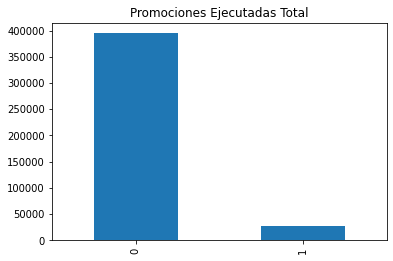

In [1218]:
# Gráficos
plot = promocion1['Flag_ejecutada'].value_counts().plot(kind='bar',
                                            title='Promociones Ejecutadas Total')

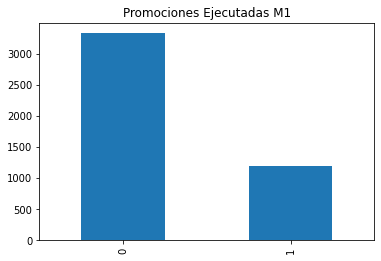

In [1223]:
plot = Train_M1['Flag_ejecutada'].value_counts().plot(kind='bar',
                                            title='Promociones Ejecutadas M1')

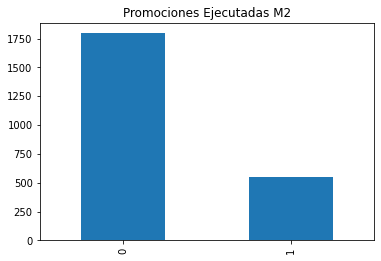

In [1224]:
plot = Train_M2['Flag_ejecutada'].value_counts().plot(kind='bar',
                                            title='Promociones Ejecutadas M2')

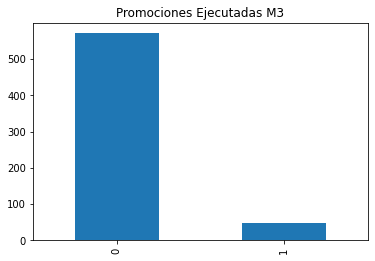

In [1225]:
plot = Train_M3['Flag_ejecutada'].value_counts().plot(kind='bar',
                                            title='Promociones Ejecutadas M3')